# Titanic data problem statement



In [271]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns   # data visualization
%matplotlib inline


In [272]:
df =  pd.read_csv('/kaggle/input/test-file/tested.csv') # importing data 

In [273]:
df.shape

(418, 12)

In [274]:
df.isna().sum() #checking any null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

up here we can see the age, Cabin abd fare has a null values.
I need **age** column so here we use average value to fill the columns
Idon't need **Cabin** column so we can drop it
also we have a missing value in **fare** so I can drop it as row that will not effect or overall data.

In [275]:
df = df.drop(['Cabin'], axis = 1) #dropping cabin column

In [276]:
missing_fare_indices = df[df['Fare'].isna()].index # finding missing index to remove it
print(missing_fare_indices)

Index([152], dtype='int64')


In [277]:
df = df.drop([152]) # dropping missing Fare (using index)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


finding mean age to fill null values in age column.

In [278]:
mean_age = df['Age'].mean()
print(mean_age)

30.181268882175228


In [279]:
df = df.fillna(method = "ffill")

<ipython-input-279-3e5f49214ed3>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = "ffill")


By visualizing. I saw the mean method is not right for this dataset. so instead I used forward fill method.

In [280]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [281]:
df.nunique()

PassengerId    417
Survived         2
Pclass           3
Name           417
Sex              2
Age             78
SibSp            7
Parch            8
Ticket         362
Fare           169
Embarked         3
dtype: int64

*there is no duplicate.*

In [282]:
df = df.drop(columns=['Pclass','Name', 'Ticket', 'Cabin','Embarked','SibSp','Parch','PassengerId'], errors='ignore')
df

,Survived,Sex,Age,Fare
0,0,male,34.5,7.8292
1,1,female,47.0,7.0000
2,0,male,62.0,9.6875
3,0,male,27.0,8.6625
4,1,female,22.0,12.2875
...,...,...,...,...
413,0,male,28.0,8.0500
414,1,female,39.0,108.9000
415,0,male,38.5,7.2500
416,0,male,38.5,8.0500


In [283]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df

,Survived,Sex,Age,Fare
0,0,1,34.5,7.8292
1,1,0,47.0,7.0000
2,0,1,62.0,9.6875
3,0,1,27.0,8.6625
4,1,0,22.0,12.2875
...,...,...,...,...
413,0,1,28.0,8.0500
414,1,0,39.0,108.9000
415,0,1,38.5,7.2500
416,0,1,38.5,8.0500


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


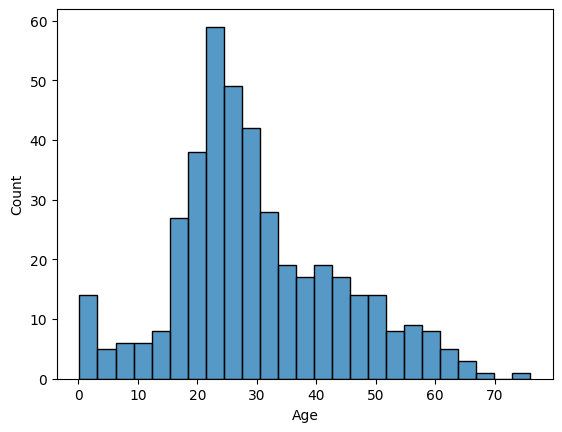

In [284]:
sns.histplot(df['Age'], bins=25,multiple = "dodge") ;

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

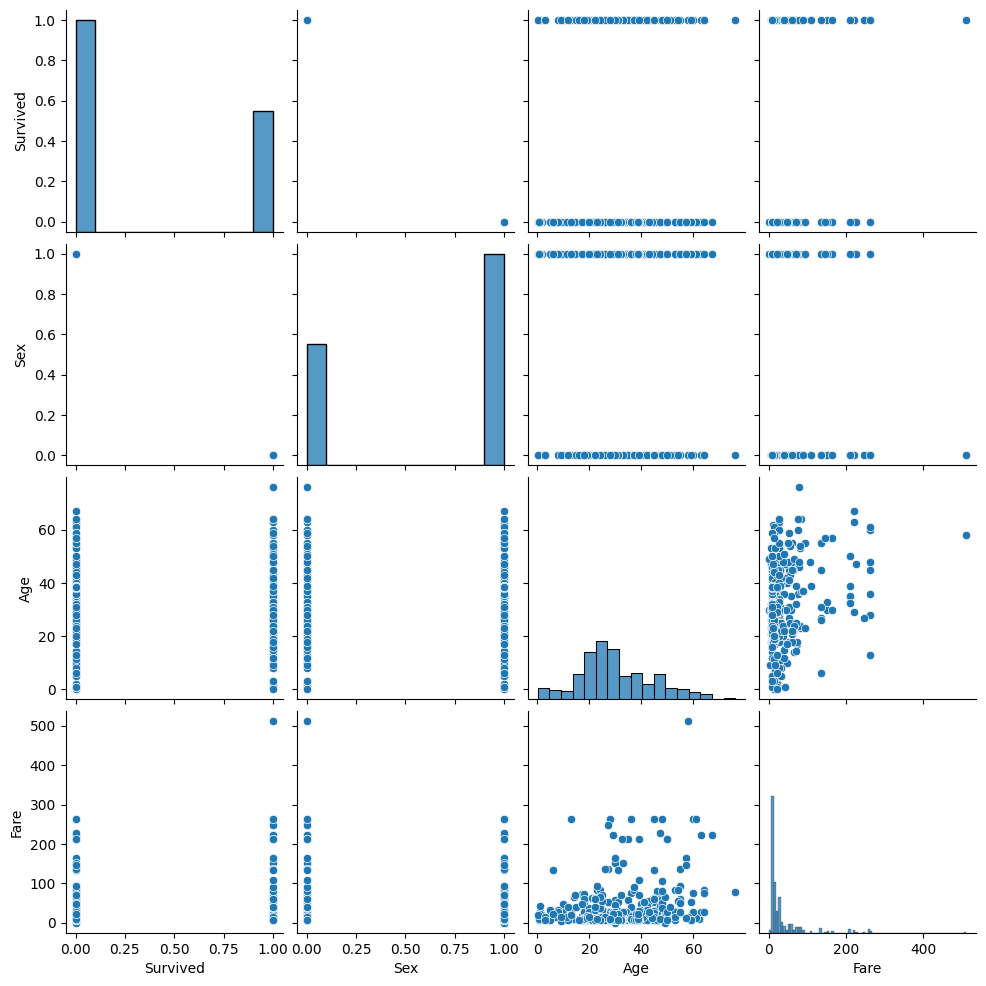

In [285]:
sns.pairplot(df)


lets manage the outliner in Fare column max function

In [286]:
#df['Fare'].mean() #including outliner
df['Fare'].max()

512.3292

In [287]:
# Calculate the mean excluding the outlier
mean_fare = df[df['Fare'] != 512.3292]['Fare'].mean()

# Replace the outlier with the mean
df.loc[df['Fare'] == 512.3292, 'Fare'] = mean_fare
df

,Survived,Sex,Age,Fare
0,0,1,34.5,7.8292
1,1,0,47.0,7.0000
2,0,1,62.0,9.6875
3,0,1,27.0,8.6625
4,1,0,22.0,12.2875
...,...,...,...,...
413,0,1,28.0,8.0500
414,1,0,39.0,108.9000
415,0,1,38.5,7.2500
416,0,1,38.5,8.0500


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

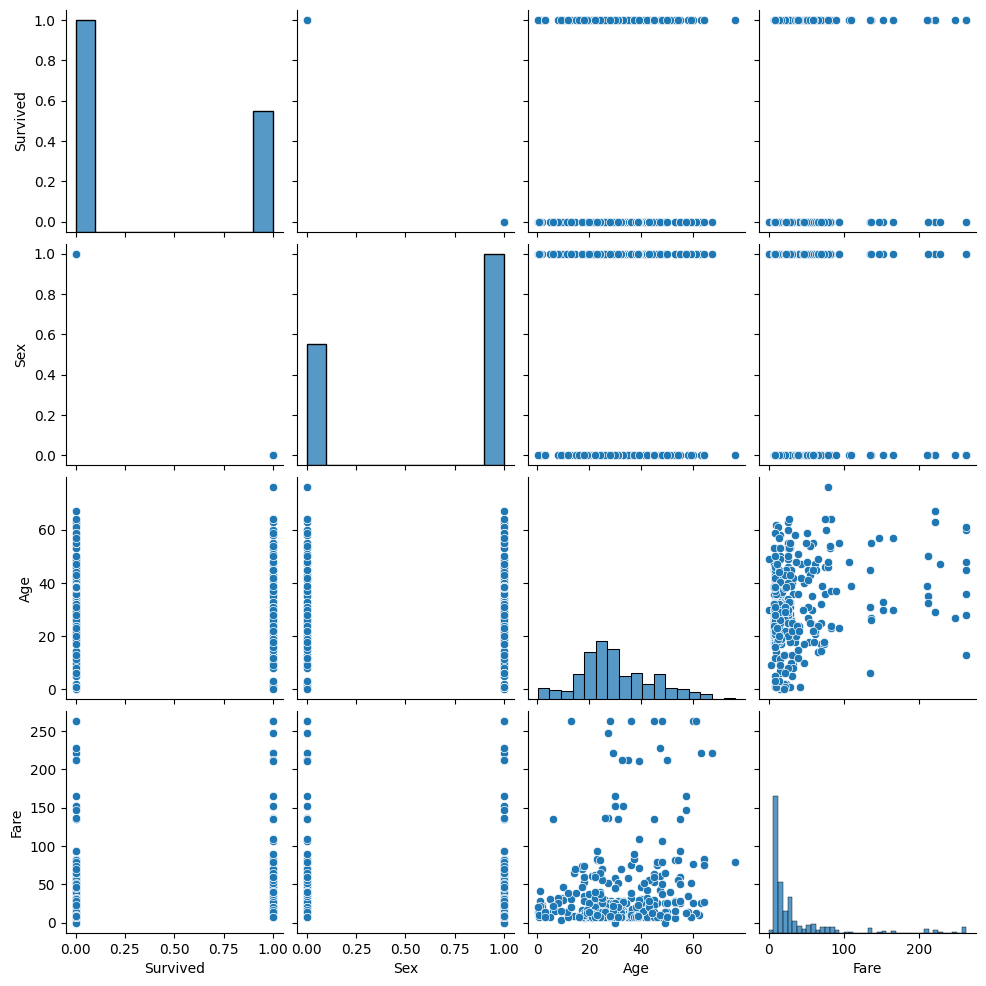

In [288]:
sns.pairplot(df);


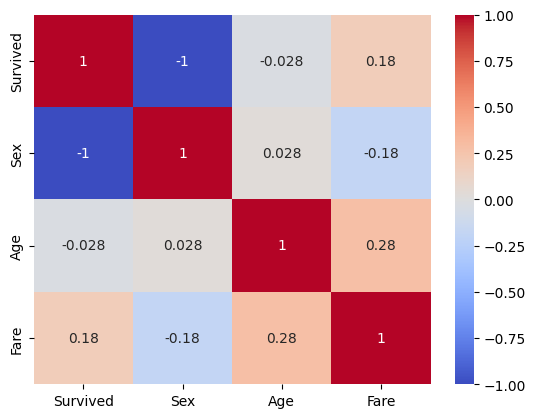

In [290]:
sns.heatmap(df.corr(), vmin=-1, annot=True, cmap='coolwarm');